<a href="https://colab.research.google.com/github/sharminislamshroddha/machine_learning/blob/main/011_image_segmentation_using_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**

In [ ]:
import PIL
import numpy as np
from sklearn.cluster import KMeans
from google.colab import files
import matplotlib.pyplot as plt

## **Upload the image file**

In [ ]:
uploaded = files.upload()

file_name = list(uploaded.keys())[0]

print('\nFile name: {0}'.format(file_name))

Saving test.jpg to test.jpg

File name: test.jpg


## **Read the Image file**

In [ ]:
image = np.asarray(PIL.Image.open(file_name))

image.shape

(423, 785, 3)

In [ ]:
#reshapes the image array into a two-dimensional array with three channels per pixel

X = image.reshape(-1, 3) 

print(X.shape)

(332055, 3)


## **KMeans Clustering**

In [ ]:
# kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

# segmented_img = kmeans.cluster_centers_[kmeans.labels_]

# segmented_img = segmented_img.reshape(image.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

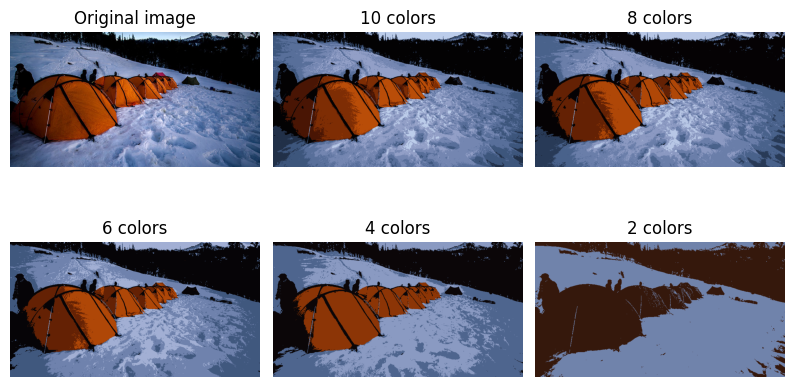

In [ ]:
segmented_imgs = {}

n_colors = (10, 8, 6, 4, 2)

for n_clusters in n_colors:
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    kmeans.fit(X)
    
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    
    segmented_imgs[n_clusters] = segmented_img.reshape(image.shape)

plt.figure(figsize=(10, 5))

plt.subplots_adjust(wspace=0.05, hspace=0.2)

plt.subplot(2, 3, 1)

plt.imshow(image)

plt.title("Original image")

plt.axis('off')

idx = 0

for n_clusters in n_colors:
    
    plt.subplot(2, 3, 2 + idx)
    
    plt.imshow(segmented_imgs[n_clusters] / 255)
    
    plt.title('{0} colors'.format(n_clusters))
    
    plt.axis('off')

    idx+=1

plt.show()